
# Prognozowanie, ale nie pogody

### prognozowanie zapotrzebowania na energię elektryczną w mieszkaniu Stakeholder: elektrownia starająca się ustalić kiedy możliwe będzie przeprowadzenie napraw z uwagi na niższe zużycie energii

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("../data/household_power_consumption.csv", sep=";")

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_18860\3643888429.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/household_power_consumption.csv", sep=";")


In [55]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [64]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,2010-11-26,0 days 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,0 days 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,0 days 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,0 days 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,2010-11-26,0 days 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [57]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [58]:
rows_with_questionmark_insteed_of_nan = df[df.applymap(lambda x: x == '?').any(axis=1)]

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_18860\2988244428.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rows_with_questionmark_insteed_of_nan = df[df.applymap(lambda x: x == '?').any(axis=1)]


In [59]:
rows_with_questionmark_insteed_of_nan

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [60]:
df.drop(rows_with_questionmark_insteed_of_nan.index, inplace=True)

In [61]:
select_columns = ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[select_columns] = df[select_columns].astype(float)
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_timedelta(df["Time"])

C:\Users\Wojciech\AppData\Local\Temp\ipykernel_18860\2241727472.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   Date                   datetime64[ns] 
 1   Time                   timedelta64[ns]
 2   Global_active_power    float64        
 3   Global_reactive_power  float64        
 4   Voltage                float64        
 5   Global_intensity       float64        
 6   Sub_metering_1         float64        
 7   Sub_metering_2         float64        
 8   Sub_metering_3         float64        
dtypes: datetime64[ns](1), float64(7), timedelta64[ns](1)
memory usage: 156.3 MB


In [63]:
df.describe()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280,2049280,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-01 13:00:00.309181952,0 days 11:59:44.088557932,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 00:00:00,0 days 00:00:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-10 00:00:00,0 days 05:59:00,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-11-30 00:00:00,0 days 12:00:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-11-23 00:00:00,0 days 18:00:00,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 00:00:00,0 days 23:59:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,0 days 06:55:52.414455896,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


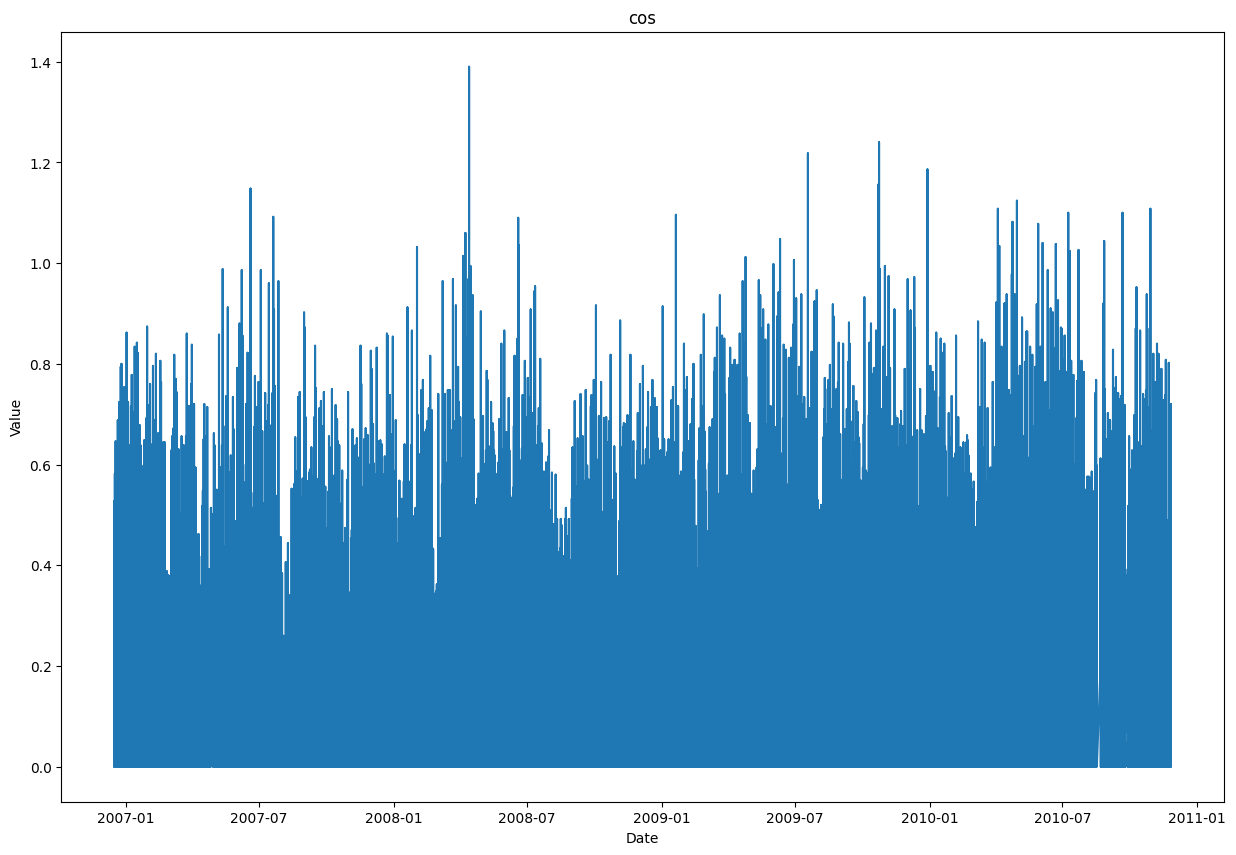

In [72]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('cos')

plt.plot(df["Date"], df["Global_reactive_power"])

plt.show()